In [19]:
#@title Imports.

import numpy as np
import tensorflow as tf
import os

from matplotlib import pyplot as plt

print(f"Tensorflow version: {tf.__version__}")

def load_image(path_to_image):
  """
  Loads a 1-channel (grayscale) image from given path.
  """
  image = tf.io.read_file(path_to_image)
  image = tf.image.decode_image(image, channels=1)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, (128, 128))
  image = image[tf.newaxis, :]
  return image



Tensorflow version: 2.12.0


In [20]:
#@title Build various edge-detection operators.
class MleMasterclassEdgeDetection(tf.Module):

  @tf.function(input_signature=[tf.TensorSpec([1, 128, 128, 1], tf.float32)])
  def vertical_edge_operator(self, image):
    filter = tf.constant([[1.0, 0.0, -1.0],
                          [1.0, 0.0, -1.0],
                          [1.0, 0.0, -1.0]],
                         dtype=tf.float32, shape=[3, 3, 1, 1])
    return tf.nn.conv2d(image, filter, 1, "SAME")

  @tf.function(input_signature=[tf.TensorSpec([1, 128, 128, 1], tf.float32)])
  def horizontal_edge_operator(self, image):
    filter = tf.constant([[1.0, 1.0, 1.0],
                          [0.0, 0.0, 0.0],
                          [-1.0, -1.0, -1.0]],
                         dtype=tf.float32, shape=[3, 3, 1, 1])
    return tf.nn.conv2d(image, filter, 1, "SAME")

  @tf.function(input_signature=[tf.TensorSpec([1, 128, 128, 1], tf.float32)])
  def sobel_operator(self, image):
    # https://en.wikipedia.org/wiki/Sobel_operator
    sobel_x = tf.constant([[-1.0, 0.0, 1.0],
                           [-2.0, 0.0, 2.0],
                           [-1.0, 0.0, 1.0]],
                          dtype=tf.float32, shape=[3, 3, 1, 1])
    sobel_y = tf.constant([[ 1.0,  2.0,  1.0],
                           [ 0.0,  0.0,  0.0],
                           [-1.0, -2.0, -1.0]],
                          dtype=tf.float32, shape=[3, 3, 1, 1])
    gx = tf.nn.conv2d(image, sobel_x, 1, "SAME")
    gy = tf.nn.conv2d(image, sobel_y, 1, "SAME")
    return tf.math.sqrt(gx * gx + gy * gy)

  @tf.function(input_signature=[tf.TensorSpec([1, 128, 128, 1], tf.float32)])
  def blur_operator(self, image):
    filter = tf.constant([[0.0625, 0.0625, 0.0625, 0.0625],
                          [0.0625, 0.0625, 0.0625, 0.0625],
                          [0.0625, 0.0625, 0.0625, 0.0625],
                          [0.0625, 0.0625, 0.0625, 0.0625]],
                         dtype=tf.float32, shape=[4, 4, 1, 1])
    return tf.nn.conv2d(image, filter, 1, "SAME")

tf_module = MleMasterclassEdgeDetection()

In [21]:
#@title Visualize input and output images.

def visualize_images(input, output):
  fig, axs = plt.subplots(1, 2)

  axs[0].imshow(input.reshape(128, 128), cmap="gray")
  axs[0].set_title("Input image.")
  axs[1].imshow(output.reshape(128, 128), cmap="gray")
  axs[1].set_title("Output image.")

  axs[0].axis("off")
  axs[1].axis("off")
  fig.tight_layout()
  fig.show()

def visualize_all_operators(image):
  vertical_edge_output = tf_module.vertical_edge_operator(image).numpy()
  horizontal_edge_output = tf_module.horizontal_edge_operator(image).numpy()
  sobel_output = tf_module.sobel_operator(image).numpy()
  blur_output = tf_module.blur_operator(image).numpy()

  visualize_images(image, vertical_edge_output)
  visualize_images(image, horizontal_edge_output)
  visualize_images(image, sobel_output)
  visualize_images(image, blur_output)

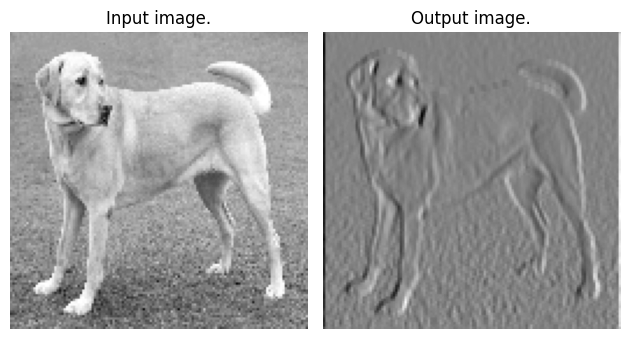

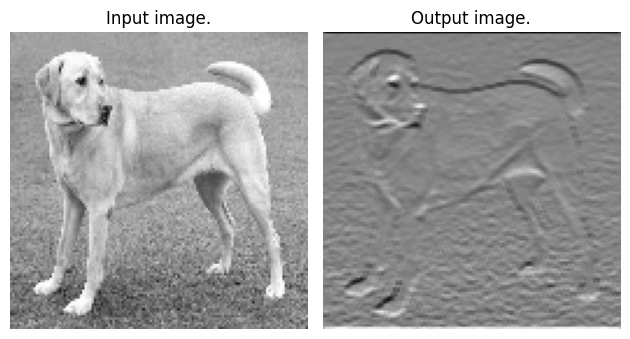

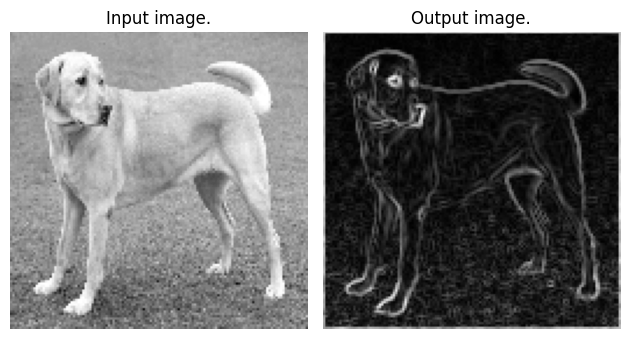

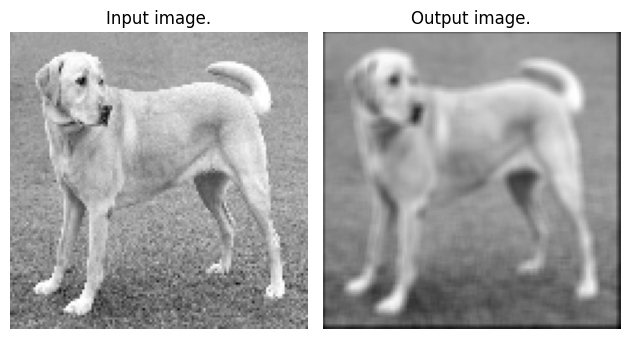

In [33]:
#@title Load a test image of a [labrador](https://commons.wikimedia.org/wiki/File:YellowLabradorLooking_new.jpg) and run the module with TF

content_path = tf.keras.utils.get_file(
    'YellowLabradorLooking_new.jpg',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
image = load_image(content_path).numpy()
visualize_all_operators(image)

31084/31084 [==============================] - 0s 0us/step


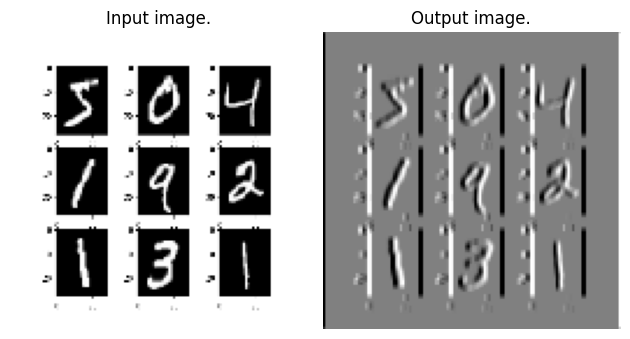

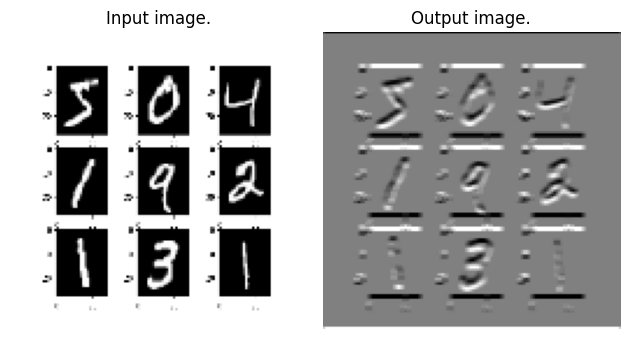

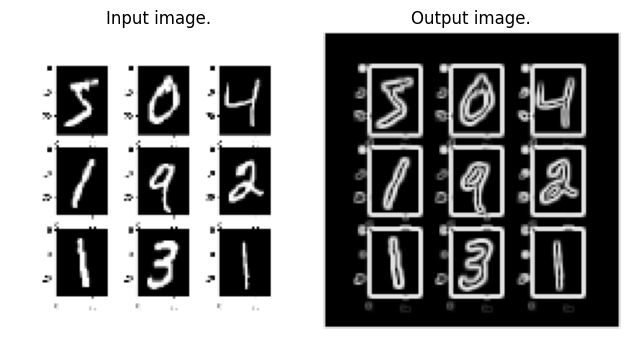

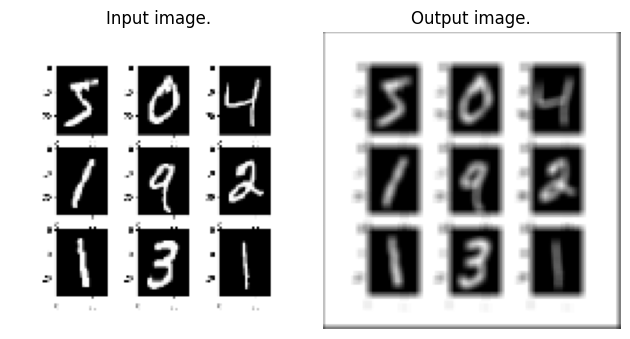

In [32]:
#@title Load an image about the MNIST dataset.
content_path = tf.keras.utils.get_file('H5BaPsg.jpg', 'https://i.imgur.com/H5BaPsg.png')
image = load_image(content_path).numpy()
visualize_all_operators(image)